# Assignment #2 - Classification

<font color="red"> <b> Due: April 10  EOD</b> </font>

<font color="blue"> NAMAN PUNDIR | namanpun@buffalo.edu | 50373843 </font>

# I. Introduction

Describe the objective of this assignment. You can briefly state how you accompilsh it.

# II. Data

You may choose one of the following three datasets to work on. Introduce your data and visualize them. Describe your observations about the data. 
1. https://archive.ics.uci.edu/ml/datasets/covertype
2. https://archive.ics.uci.edu/ml/datasets/bank+marketing
3. https://archive.ics.uci.edu/ml/datasets/Activity+recognition+using+wearable+physiological+measurements (data download link - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6960825/bin/sensors-19-05524-s001.zip)


#DATASET: 2nd dataset


# III. Method

Summarize the Least Mean Square Classifier, Fisher Linear Discriminant, Perceptron,logistic regression, and Neural Network.
Do not forget explain your implementation. 

The explanation of your codes should not be the comments in a code cell. 
Each implementation will be followed by a separate cell that should include
 - review of the 4 classification models 
 - your implementation and description


In [756]:
# from google.colab import drive
# drive.mount('/content/drive')

### Method

In [757]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline 
##your method implementation goes here
from sklearn.metrics import accuracy_score

In [758]:
# cd /content/drive/My Drive

In [759]:
from prml.preprocess import polynomial 

In [760]:
# cd prml/linear

In [761]:
#IMPORTING ALL LIBRARIES AND DEPENDENCIES:
import softmax_regression
import logistic_regression
import fishers_linear_discriminant
import least_squares_classifier
import perceptron
import classifier
np.random.seed(1234)

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures


In [762]:
#DATA READ
df = pd.read_csv('/content/bank-additional-full.csv',delimiter=";")


In [763]:
list_cat_col=[ 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome','y']
list_all=list(df.columns)

In [764]:
#DATA PREPROCESSING: ENCODING DATASET:
def data_read_encoder(path,list_cat_col,target):

    df_bank_raw = pd.read_csv(path,delimiter = ';')
    list_all = (list(df_bank_raw.columns))
    index = list_all.index(target)

    for x in list_cat_col :
        df_bank_raw[x] =  LabelEncoder().fit_transform(df_bank_raw[x])
    list_all.pop(index)    
    x_list = list_all
    y_list = [target]

    df_bank_updated = df_bank_raw[x_list+y_list]
    return(df_bank_updated,x_list,y_list)

In [765]:
#DATA ENCODING FUNCTION CALL:
df_bank_updated,x_list,y_list=data_read_encoder("//content/bank-additional-full.csv",list_cat_col,"y")

In [766]:
#THE NEW DATASET AFTER ENCODING:
df_bank_updated.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,0,26,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,0,26,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,0,26,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,0,26,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,0,26,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [767]:
#initializing y to result column:
y = (df_bank_updated['y'] )


In [768]:
##initializing x to rest of the column:
feature_cols = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
#feature_cols.remove("y")
x = np.asarray(df_bank_updated[feature_cols])

In [769]:
#Data split into train and test:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
feature=PolynomialFeatures(1)
x_train=feature.fit_transform(x_train)
x_test=feature.fit_transform(x_test)


**1. LEAST SQUARE CLASSIFIER:**

In [770]:
#Model fitting and accuracy computing
model1=least_squares_classifier.LeastSquaresClassifier()
model1.fit(x_train,y_train)
y1=model1.classify(x_test)
ac1=accuracy_score(y_test,y1)
print("Accuracy of Least Square Classifier is: \n"+str(ac1*100)+"%")

ap1 = average_precision_score(y_test, y1)
print("Precision of Least Square Classifier is: \n"+str(ap1*100)+"%")

rs1=recall_score(y_test,y1)
print("Recall of Least Square Classifier is: \n"+str(rs1*100)+"%")

Accuracy of Least Square Classifier is: 
90.44671036659383%
Precision of Least Square Classifier is: 
29.510254114795792%
Recall of Least Square Classifier is: 
32.309322033898304%


confusion matrix:
 [[7146  148]
 [ 639  305]]


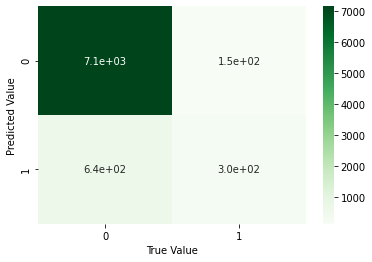

In [771]:
#confusion matrix calculation
cm1=confusion_matrix(y_test,y1)
print("confusion matrix:\n",cm1)
sn.heatmap(cm1, annot=True, cmap="Greens")
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

**2.LOGISTIC REGRESSION**

In [772]:
#again splitting the data to make sure previous classifier changes do not impact on the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
feature=PolynomialFeatures(1)
x_train=feature.fit_transform(x_train)
x_test=feature.fit_transform(x_test)

In [773]:
#Model fitting and accuracy computing
model2=logistic_regression.LogisticRegression()
model2.fit(x_train,y_train)
y2=model2.classify(x_test)
ac2=accuracy_score(y_test,y2)
print("Accuracy of LOGISTIC REGRESSION is: \n"+str(ac2*100)+"%")

ap2 = average_precision_score(y_test, y2)
print("Precision of LOGISTIC REGRESSION is: \n"+str(ap2*100)+"%")

rs2=recall_score(y_test,y2)
print("Recall of LOGISTIC REGRESSION is: \n"+str(rs2*100)+"%")

Accuracy of LOGISTIC REGRESSION is: 
90.95654285020636%
Precision of LOGISTIC REGRESSION is: 
34.840168926907836%
Recall of LOGISTIC REGRESSION is: 
42.478813559322035%


confusion matrix:
 [[7092  202]
 [ 543  401]]


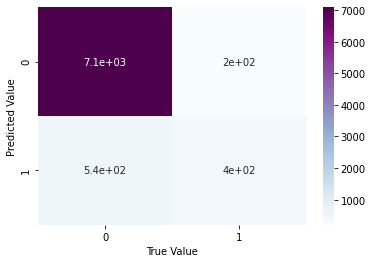

In [774]:
#confusion matrix calculation
cm2=confusion_matrix(y_test,y2)
print("confusion matrix:\n",cm2)
sn.heatmap(cm2, annot=True, cmap="BuPu")
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

**3.PERCEPTRON**

In [775]:
#again splitting the data to make sure previous classifier changes do not impact on the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
feature=PolynomialFeatures(1)
x_train=feature.fit_transform(x_train)
x_test=feature.fit_transform(x_test)

In [776]:
#Model fitting and accuracy computing
model3=Perceptron()
model3.fit(x_train,y_train)
y3=model3.predict(x_test)
ac3=accuracy_score(y_test,y3)
print("Accuracy of PERCEPTRON: \n"+str(ac3*100)+"%")
ap3= average_precision_score(y_test, y3)
print("Precision of PERCEPTRON is: \n"+str(ap3*100)+"%")
rs3=recall_score(y_test,y3)
print("Recall of PERCEPTRON is: \n"+str(rs3*100)+"%")

Accuracy of PERCEPTRON: 
88.58946346200534%
Precision of PERCEPTRON is: 
11.862953715934015%
Recall of PERCEPTRON is: 
0.6355932203389831%


confusion matrix:
 [[7292    2]
 [ 938    6]]


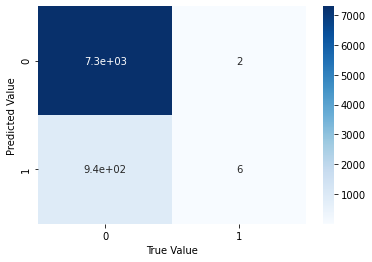

In [777]:
#confusion matrix calculation
cm3=confusion_matrix(y_test,y3)
print("confusion matrix:\n",cm3)
sn.heatmap(cm3, annot=True, cmap="Blues")
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

**4. FISHER LINEAR DISCRIMINANT**

In [778]:
#again splitting the data to make sure previous classifier changes do not impact on the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
feature=PolynomialFeatures(1)
x_train_f=feature.fit_transform(x_train)
x_test_f=feature.fit_transform(x_test)

In [779]:
#Model fitting and accuracy computing
model4=fishers_linear_discriminant.FishersLinearDiscriminant()
model4.fit(x_train,y_train)
y4=model4.classify(x_test)
ac4=accuracy_score(y_test,y4)
print("Accuracy of FISHER LINEAR DISC. is: \n"+str(ac4*100)+"%")

ap4 = average_precision_score(y_test, y4)
print("Precision of FISHER LINEAR DISC is: \n"+str(ap4*100)+"%")

rs4=recall_score(y_test,y4)
print("Recall of FISHER LINEAR DISC is: \n"+str(rs4*100)+"%")

Accuracy of FISHER LINEAR DISC. is: 
85.61544064093226%
Precision of FISHER LINEAR DISC is: 
37.8557403489668%
Recall of FISHER LINEAR DISC is: 
82.83898305084746%


confusion matrix:
 [[6271 1023]
 [ 162  782]]


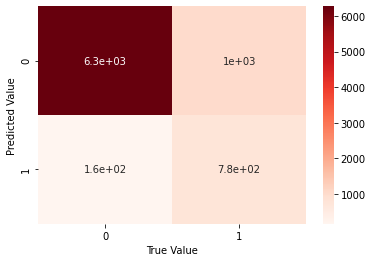

In [780]:
#confusion matrix calculation
cm4=confusion_matrix(y_test,y4)
print("confusion matrix:\n",cm4)
sn.heatmap(cm4, annot=True, cmap="Reds")
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
p4=plt.show()

# IV. Experiments

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

********************ACCURACY PERCENTAGE TABLE:********************

LEAST SQUARE CLASSIFICATION: 90.44671036659383 %

LOGISTIC REGRESSION:         90.95654285020636 %

PERCEPTRON:                  88.58946346200534 %

FISHER LINEAR DISCRIMINANT:  85.61544064093226 %

********************PRECISION SCORE TABLE:***********************

LEAST SQUARE CLASSIFICATION: 29.510254114795792

LOGISTIC REGRESSION:         34.840168926907836

PERCEPTRON:                  11.862953715934015

FISHER LINEAR DISCRIMINANT:  37.8557403489668

********************RECALL SCORE TABLE:**************************

LEAST SQUARE CLASSIFICATION: 0.3230932203389831

LOGISTIC REGRESSION:         0.4247881355932203

PERCEPTRON:                  0.006355932203389831

FISHER LINEAR DISCRIMINANT:  0.8283898305084746
*******************************************************************


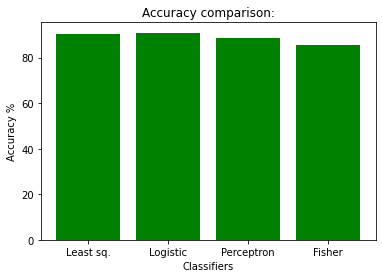

In [784]:
################################## FINAL OUTPUT ##############################################
print("********************ACCURACY PERCENTAGE TABLE:********************")
print("\nLEAST SQUARE CLASSIFICATION:",ac1*100,"%")
print("\nLOGISTIC REGRESSION:        ",ac2*100,"%")
print("\nPERCEPTRON:                 ",ac3*100,"%")
print("\nFISHER LINEAR DISCRIMINANT: ",ac4*100,"%")
print("\n********************PRECISION SCORE TABLE:***********************")
print("\nLEAST SQUARE CLASSIFICATION:",ap1*100,)
print("\nLOGISTIC REGRESSION:        ",ap2*100,)
print("\nPERCEPTRON:                 ",ap3*100,)
print("\nFISHER LINEAR DISCRIMINANT: ",ap4*100,)
print("\n********************RECALL SCORE TABLE:**************************")
print("\nLEAST SQUARE CLASSIFICATION:",rs1)
print("\nLOGISTIC REGRESSION:        ",rs2)
print("\nPERCEPTRON:                 ",rs3)
print("\nFISHER LINEAR DISCRIMINANT: ",rs4)
print("*******************************************************************")
category = ['Least sq.', 'Logistic', 'Perceptron', 'Fisher']
Acc = [ac1*100,ac2*100,ac3*100,ac4*100]
x_pos = [i for i, _ in enumerate(category)]
plt.bar(x_pos, Acc, color='green')
plt.xlabel("Classifiers")
plt.ylabel("Accuracy %")
plt.title("Accuracy comparison:")
plt.xticks(x_pos, category)
plt.show()

# Conclusions

Summarize your work here. 
Which classifier do you think the best? 
Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

**I have taken Dataset2 for this assignment i.e Bank dataset.**
#####**Steps:** 
1. Reading the data.
2. Encoding the data as the dataset was categorical and contain some string values.
3. Splitting the data and tranforming the splitted data.
4. Using 4 classifier in prml.linear: Least Sq. Classifier, Logistic Regression, Perceptron, Fisher Linear Discriminant.
5. Selecting model and fitting the data for classification.
6. Computing accuracy, precision and recall.
7. Computing confusion matrix.
8. Plotting confusion matrix. 

**According to my final accuracy table *LOGISTIC Regression with 90.95%* accuracy was the best for the dataset2-BANK dataset.**

**Challenges:** I have previously worked in a simpler dataset where the data is not categorical or in different datatypes. Converting the dataset in one-hot encoding was a new thing to me and I learned how to preprocess the data so that we can use any algorithm in it succesfully.




# References
1. UBlearn>documents>prml libraries + classification.ipynb
2. https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python
3. https://pbpython.com/categorical-encoding.html
4. http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
5. https://seaborn.pydata.org/generated/seaborn.heatmap.html